In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [10]:
data = pd.read_csv(r'C:\Users\gaval\Downloads\wscube\edaperfrom\CC GENERAL.csv')


In [13]:
print(data.head(30))


   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   C10001    40.900749           0.818182      95.40              0.00   
1   C10002  3202.467416           0.909091       0.00              0.00   
2   C10003  2495.148862           1.000000     773.17            773.17   
3   C10004  1666.670542           0.636364    1499.00           1499.00   
4   C10005   817.714335           1.000000      16.00             16.00   
5   C10006  1809.828751           1.000000    1333.28              0.00   
6   C10007   627.260806           1.000000    7091.01           6402.63   
7   C10008  1823.652743           1.000000     436.20              0.00   
8   C10009  1014.926473           1.000000     861.49            661.49   
9   C10010   152.225975           0.545455    1281.60           1281.60   
10  C10011  1293.124939           1.000000     920.12              0.00   
11  C10012   630.794744           0.818182    1492.18           1492.18   
12  C10013  1516.928620  

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [15]:
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [19]:
import pandas as pd

# sirf numeric columns ke liye missing values fill karo
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)


In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [22]:

data.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Text(0.5, 1.0, 'Cash Advance Outliers')

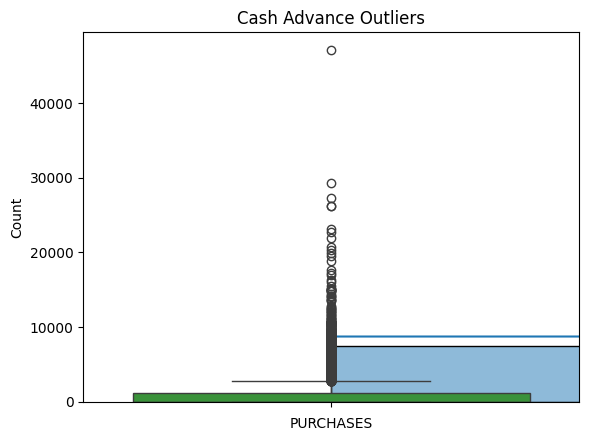

In [23]:
sns.histplot(data['PURCHASES'], bins=30, kde=True)
plt.title('Distribution of Purchases')

sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=data)
plt.title('Credit Limit vs Balance')

sns.boxplot(data['CASH_ADVANCE'])
plt.title('Cash Advance Outliers')


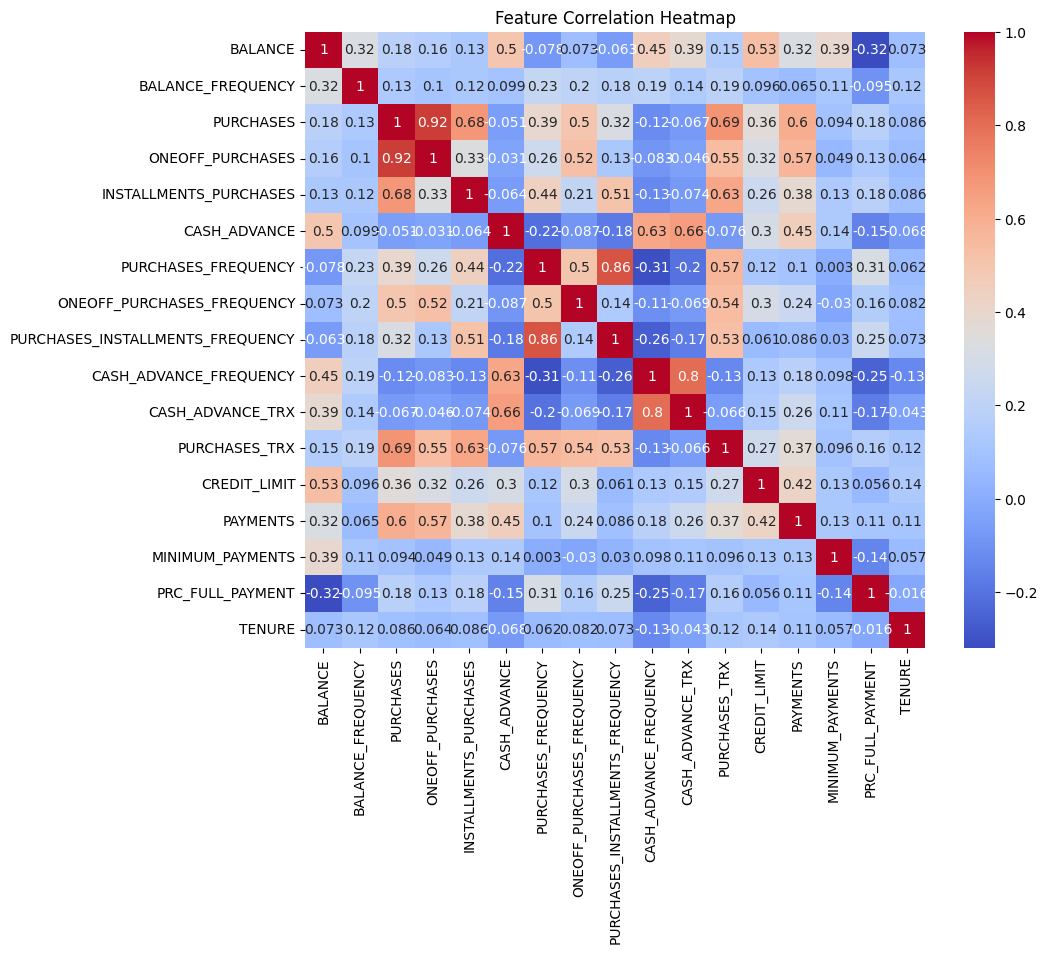

In [25]:
corr = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [26]:
X = data.drop(['CUST_ID'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


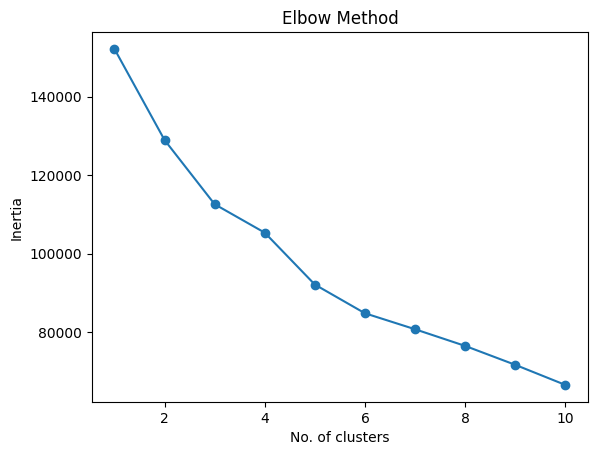

In [27]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.show()


In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


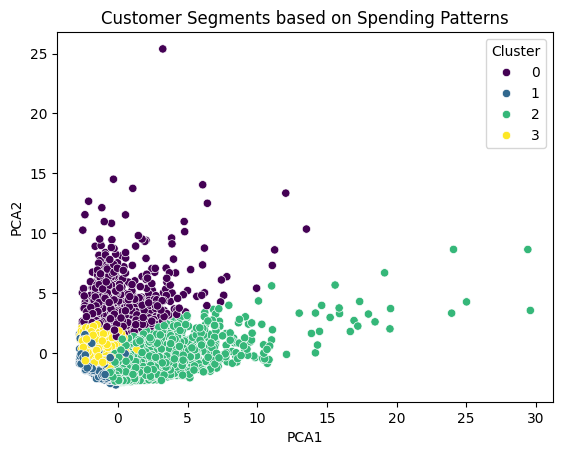

In [29]:
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:,0]
data['PCA2'] = X_pca[:,1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments based on Spending Patterns')
plt.show()


In [31]:
cluster_summary = data.select_dtypes(include=['number']).groupby(data['Cluster']).mean()
print(cluster_summary)


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5023.958508           0.967107   721.184928        453.485000   
1         109.464707           0.412883   351.589913        191.487250   
2        1253.422099           0.974766  2181.418772       1241.370362   
3        1500.348531           0.966640   282.216074        209.226223   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    267.804742   5075.737329             0.329511   
1                    160.571811    299.684391             0.320703   
2                    940.311888    234.489319             0.928436   
3                     73.305481    789.088912             0.206247   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':  # object = string
        data[col] = le.fit_transform(data[col].astype(str))

cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


             CUST_ID      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
Cluster                                                             
0        3758.457732  5023.958508           0.967107   721.184928   
1        5135.718981   109.464707           0.412883   351.589913   
2        4311.598910  1253.422099           0.974766  2181.418772   
3        4538.824036  1500.348531           0.966640   282.216074   

         ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
Cluster                                                           
0              453.485000              267.804742   5075.737329   
1              191.487250              160.571811    299.684391   
2             1241.370362              940.311888    234.489319   
3              209.226223               73.305481    789.088912   

         PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Cluster                                                    
0                   0.329511                    0.161791   
1 

In [33]:
data.dtypes


CUST_ID                               int64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
Cluster                               int32
PCA1                                float64
PCA2                                float64
dtype: object

In [34]:
data.select_dtypes(include=['object']).columns


Index([], dtype='object')